## V. SIRを書く(2)————SIRのパラメーターβを行列にする

- 行列・ベクトル計算の都合上，すべて縦ベクトルにする

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#基本設定
GROUPS=[
        ["A"],
        ["B"],
        ["C"]
        ]
ONES=np.ones_like(GROUPS, dtype=np.float64)
ZEROS=np.zeros_like(GROUPS, dtype=np.float64)

#SIRモデル定数
R0=1.8
γ=ONES*1/15
β=ONES*R0*γ
print("β",β)
T=[
   [1./3.,1./3.,1./3.],
   [1./3.,1./3.,1./3.],
   [1./3.,1./3.,1./3.],
]
#β=β*T*10
print("T",T)
print("γ",γ)

β [[0.12]
 [0.12]
 [0.12]]
T [[0.3333333333333333, 0.3333333333333333, 0.3333333333333333], [0.3333333333333333, 0.3333333333333333, 0.3333333333333333], [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]]
γ [[0.06666667]
 [0.06666667]
 [0.06666667]]


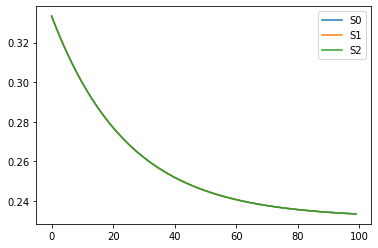

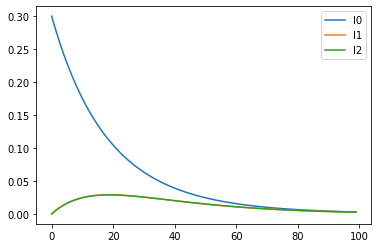

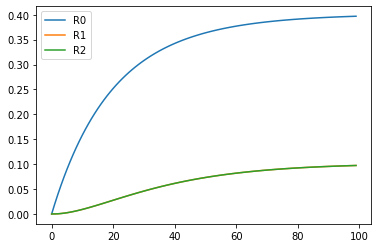

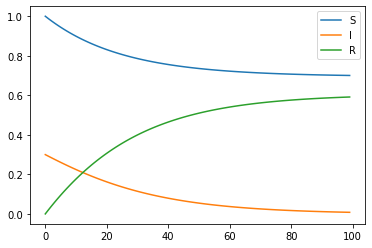

In [2]:
#SIRモデル変数初期値
S=[ONES/3.0]
I=[np.array([
            [0.3],
            [0.0],
            [0.0]
            ])]
R=[ZEROS]

def calc(s, i ,r):
    #差分の計算
    #ds=-β*s*sum(i) #グループに関係なく接触(従来型)
    #ds=-β*s*(T@i) #IiがTi,jの割合で他グループjに接触する
    #ds=-Tinv(@β*(T@s)*(T@i)) #IiがTi,jの割合で他グループjに接触する
    dr=γ*i
    di=-ds-dr
    #差分を適用した値を返す
    return s+ds, i+di, r+dr

def run(TMAX=100):
    s=S[0]
    i=I[0]
    r=R[0]
    for t in range(1,TMAX):
        s,i,r=calc(s, i, r)
        S.append(s)
        I.append(i)
        R.append(r)

run()

for i in range(len(GROUPS)):
    plt.plot([S[t][i] for t in range(len(S))],label='S'+str(i))
plt.legend()
plt.show()
for i in range(len(GROUPS)):
    plt.plot([I[t][i] for t in range(len(I))],label='I'+str(i))
plt.legend()
plt.show()
for i in range(len(GROUPS)):
    plt.plot([R[t][i] for t in range(len(R))],label='R'+str(i))
plt.legend()
plt.show()

plt.plot([sum(v) for v in S],label='S')
plt.plot([sum(v) for v in I],label='I')
plt.plot([sum(v) for v in R],label='R')
plt.legend()
plt.show()


### 行列T

`S`の合計`sum(S)`が保存されるように`T`を決めたい．そこで，下図のように縦計が1になるようにしておく．

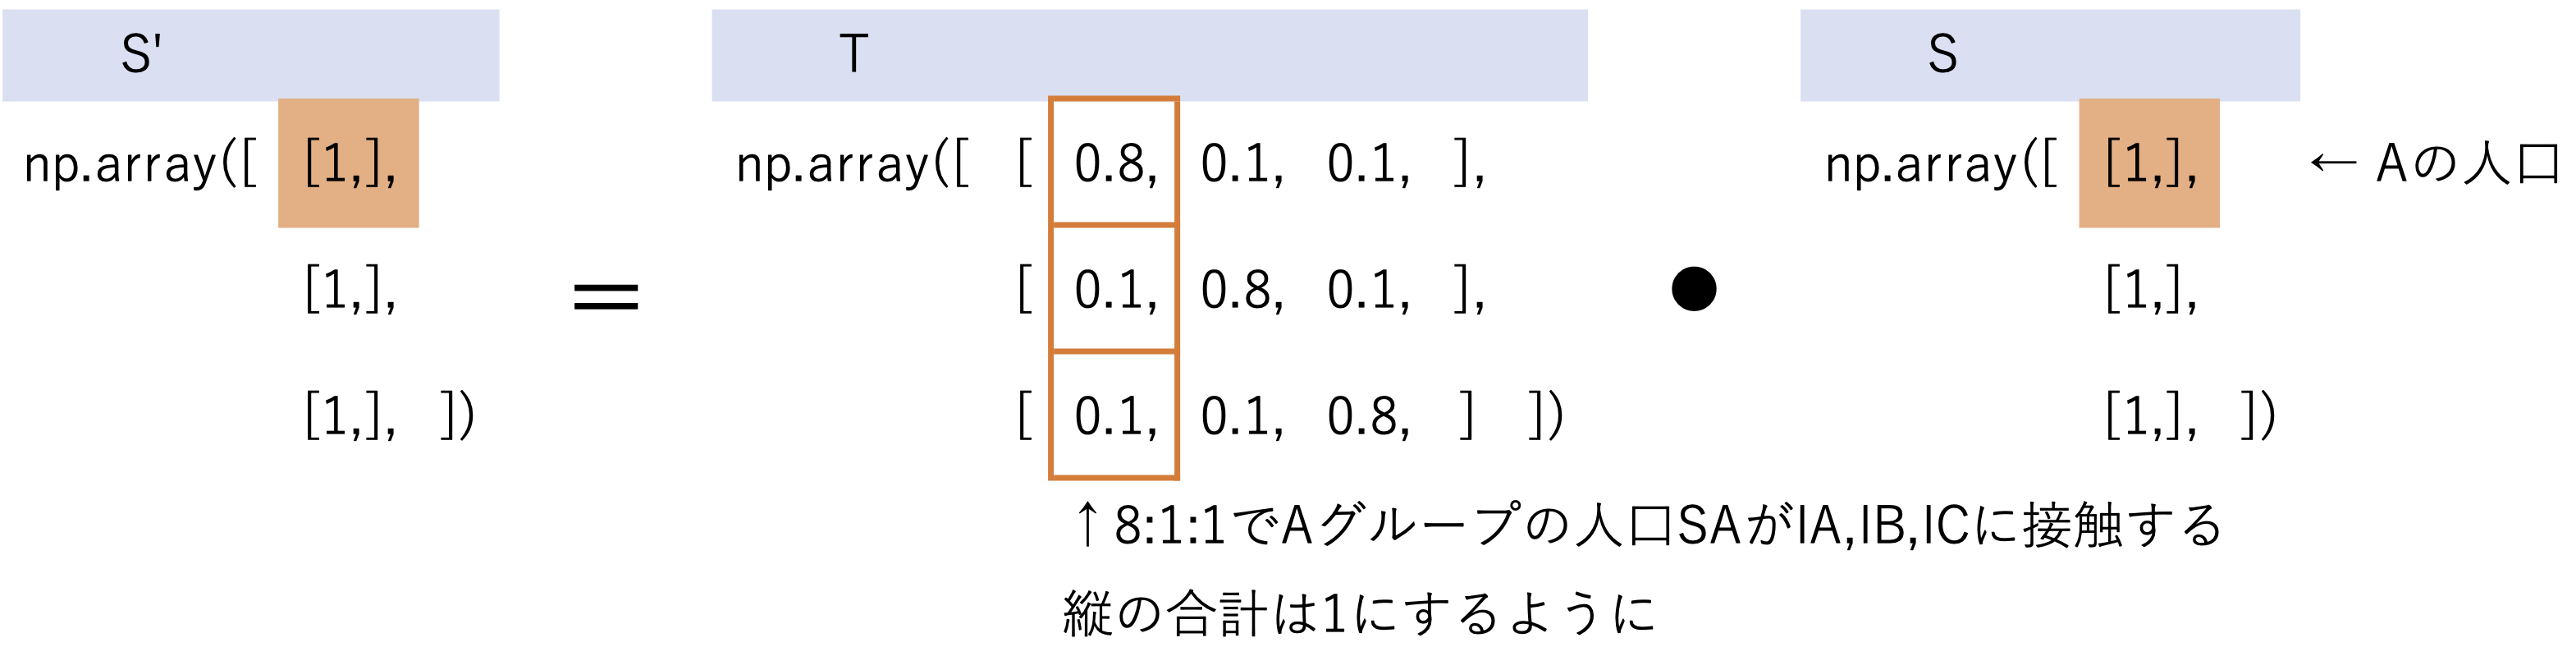


### 参考: 行列の縦の合計を1にする理由
*(proof.)*

図では`S`の要素をすべて1にしたが．これを$[[S_0,S_1,S_2]]$とすると，左辺の合計`sum(S')`が，

$$
sum(S')=S'_0+S'_1+S'_2\\
=(T_{0,0}S_0+T_{0,1}S_1+T_{0,2}S_2)\\
+(T_{1,0}S_0+T_{1,1}S_1+T_{1,2}S_2)\\
+(T_{2,0}S_0+T_{2,1}S_1+T_{2,2}S_2)
$$

となる．右辺を縦に見ると次のように分割できるが，ここで`T`の縦計$\sum_i T_{i,j}=1 (ただしj \in {0,1,2})$を利用すると右辺に整理できる．

$$
S_0\sum_{i=0}^2 T_{i,0}=S_0,\\
S_1\sum_{i=0}^2 T_{i,1}=S_1,\\
S_2\sum_{i=0}^2 T_{i,2}=S_2
$$

これらを元の$sum(S')$に代入すると結局，

$$
sum(S')=S_0+S_1+S_2=sum(S)
$$

となり，`S`のすべての要素の合計は`S'`で保存される．

*(Q.E.D)*

### おわり

以上で，コースは終了です．